<h1>KNN</h1>
KNN의 주요 개념<br>
K값:
예측 시 고려할 **가장 가까운 이웃(near neighbors)**의 수를 의미합니다.<br>
K값이 작으면 모델이 데이터에 과적합(overfitting)될 가능성이 높고, K값이 크면 모델이 과소적합<br>(underfitting)될 수 있습니다.<br><br>
거리 계산:
새로운 데이터와 기존 데이터 간의 거리를 계산하여 가까운 데이터가 무엇인지 판단합니다.<br>
거리 계산 방식에는 여러 방법이 있습니다:<br>
유클리드 거리: 가장 흔히 사용. 직선 거리.<br>
맨해튼 거리: 축을 따라 이동한 거리.<br>
민코우스키 거리: 유클리드와 맨해튼 거리의 일반화.<br>
해밍 거리: 범주형 데이터(이산값) 비교 시 사용.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

데이터준비

In [2]:
from sklearn.datasets import load_iris

In [3]:
df = load_iris()

In [4]:
x = df['data']
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#x_train, x_test, y_train, y_test = train_test_split(x,y)
#범주형일때 stratify 넣어야함 왜냐 데이터가 불균형데이터일때 균형있게 나누어줌
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=42, test_size= 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

모델 훈련(학습)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df['target_names'], df['target']

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)
knn_model.score(x_train, y_train), knn_model.score(x_test, y_test)

(0.9714285714285714, 0.9777777777777777)

In [10]:
train_scores = []
test_scores = []
for k in np.arange(1, 10, 1):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_score = knn_model.score(x_train, y_train)
    test_score = knn_model.score(x_test, y_test)
    test_scores.append(test_score)
    train_scores.append(train_score)


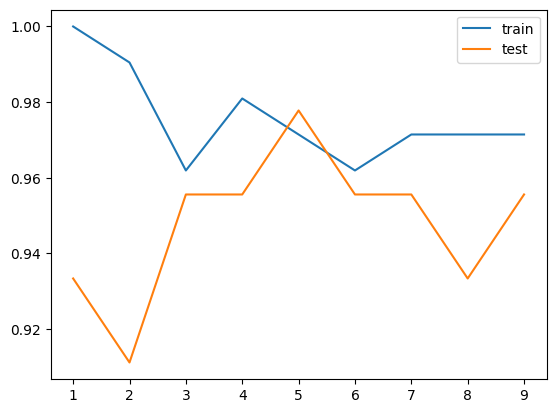

In [11]:
plt.plot(np.arange(1, 10, 1), train_scores, label = 'train')
plt.plot(np.arange(1, 10, 1), test_scores, label = 'test')

plt.legend()
plt.show()

In [12]:
x.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

모델사용

In [13]:
features = []
for feature_name in df['feature_names']:
    input_value = input("{0}:".format(feature_name))
    features.append(float(input_value))

predicted_class = knn_model.predict([features])
species = df['target_names'][predicted_class]
print("you have {0}".format(species))

you have ['versicolor']
